In [54]:
import os
import glob

import tables as tb
import numpy  as np
import pandas as pd

from collections import defaultdict

In [55]:
import matplotlib        as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib notebook
%matplotlib inline
### Useful parameters for plots
mpl.rcParams["figure.figsize"]          = 12,10
mpl.rcParams["font.size"]               = 20
mpl.rcParams["figure.max_open_warning"] = 100
mpl.rcParams["font.size"]               = 20
mpl.rcParams["font.weight"]             ='normal'
mpl.rcParams["axes.labelweight"] = "normal"
mpl.rcParams['axes.facecolor'] = 'w'
mpl.rcParams['figure.facecolor'] = 'w';

In [56]:
import invisible_cities.io.pmaps_io as pmapio
import invisible_cities.io.dst_io  as dstio
import invisible_cities.io.mcinfo_io as mcio
import gres.database.load_db as db
import invisible_cities.io.run_and_event_io as rio

import invisible_cities.core.core_functions as coref

In [57]:
nfiles = 100000
datatypes = ['22Na', '83mKr', '133Ba', 'NoSource', '57Co', '241Am', '55Fe']#[2]

### Read data

In [62]:
all_runs    = []
labels      = []


#run_numbers = [204] # Thr at -80
#all_runs.append(run_numbers)
#labels.append('83mKr closed')
#
#run_numbers = [211] # Thr at -80
#all_runs.append(run_numbers)
#labels.append('83mKr closed')

run_numbers = [763]#[1037] # Thr at -80
run_numbers = [775]#[1037] # Thr at -80
run_numbers = [1037] # Thr at -80
run_numbers = [1497] # Thr at -80
all_runs.append(run_numbers)
#labels.append('83mKr open')
labels.append('ArXe')
labels.append('Low yield')

run_numbers = [777] # Thr at -80
run_numbers = [1112] # Thr at -80
all_runs.append(run_numbers)
#labels.append('83mKr closed')
labels.append('Ar')

#
#run_numbers = [83] # Thr at -20
#all_runs.append(run_numbers)
#labels.append('All PMT trigger (high)')

sources = [datatypes[5]] * len(all_runs)

datasets_s1 = []
datasets_s2 = []


for source, run_numbers in zip(sources, all_runs):    
    data_1_s1 = []
    data_1_s2 = [] 
    
    
    for run_number in run_numbers:
        inpath = f'/home/ander/Work/GaP/real_data/{source}/R{run_number}/octavia/'
        data_1_s1.append(pd.read_hdf(inpath+f'DST_run_{run_number}_pmaps.h5', 'S1'))
        data_1_s2.append(pd.read_hdf(inpath+f'DST_run_{run_number}_pmaps.h5', 'WVF'))
#        data_1_s2.append(pd.read_hdf(inpath+f'DST_run_{run_number}_pmaps.h5', 'S2') if len(datasets_s2) == 0 else pd.read_hdf(inpath+f'DST_run_{run_number}_pmaps.h5', 'WVF'))

    data_1_s1 = pd.concat(data_1_s1).reset_index(drop=True)    
    data_1_s2 = pd.concat(data_1_s2).reset_index(drop=True)    
    
    data_1_s1['r'] = np.sqrt(data_1_s1.x**2 + data_1_s1.y**2)
    data_1_s2['r'] = np.sqrt(data_1_s2.x**2 + data_1_s2.y**2)
    datasets_s1.append(data_1_s1)
    datasets_s2.append(data_1_s2)
    print(len(data_1_s2))
    

all_weights_s1_t = [np.ones(len(data_1_s1)) * 1/(8e-9*(data_1_s1.timestamp.max() - data_1_s1.timestamp.min())) for data_1_s1 in datasets_s1]
all_weights_s2_t = [np.ones(len(data_1_s2)) * 1/(8e-9*(data_1_s2.timestamp.max() - data_1_s2.timestamp.min())) for data_1_s2 in datasets_s2]

all_weights_s1_n = [np.ones(len(data_1_s1)) * 1/len(data_1_s1) for data_1_s1 in datasets_s1]
all_weights_s2_n = [np.ones(len(data_1_s2)) * 1/len(data_1_s2) for data_1_s2 in datasets_s2]


no_weights_s1  = [np.ones(len(data_1_s1)) for data_1_s1 in datasets_s1]
no_weights_s2  = [np.ones(len(data_1_s2)) for data_1_s2 in datasets_s2]

10481
10229


In [63]:
inpath+f'DST_run_{run_number}_pmaps.h5'

'/home/ander/Work/GaP/real_data/241Am/R1112/octavia/DST_run_1112_pmaps.h5'

nt1 = 280962
nl1 = 230746
t1  = 180

nt2 = 53059
nl2 = 28314
t2 = 24

### Look at data

1150.0
0.9882644785803975
583.3333333333334
0.994818652849724


/tmp/ipykernel_2430327/4148183605.py:72: RuntimeWarning: divide by zero encountered in true_divide
  axes[2].errorbar(xc, yc/yvals[0], label=label_1, ls='', marker='o', color=f'C{i}')
/tmp/ipykernel_2430327/4148183605.py:73: RuntimeWarning: divide by zero encountered in true_divide
  axes[2].axhline((yc/yvals[0]).mean(), color=f'C{i}', ls='--')


(0.0, 1.0)

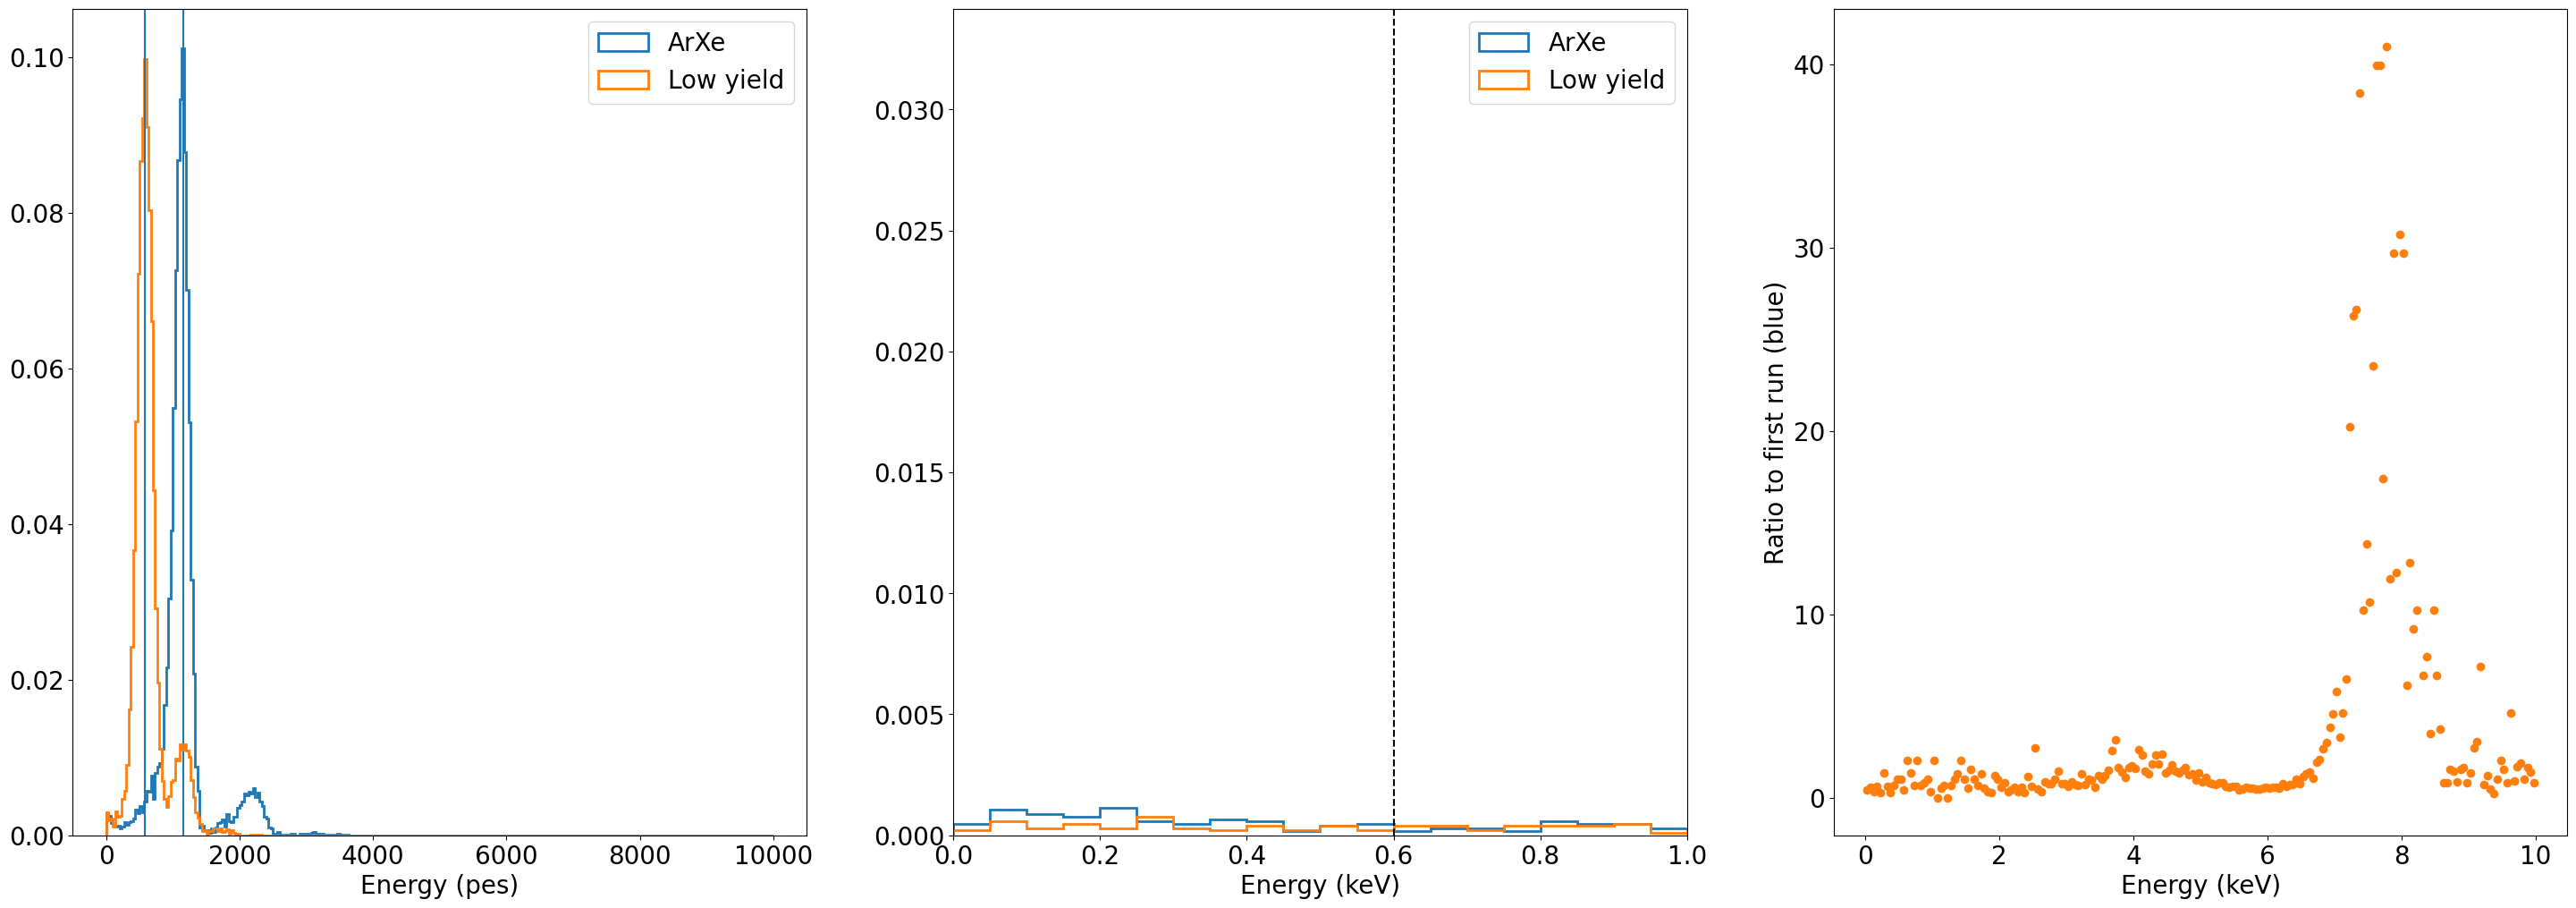

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(36, 12))

enebins = np.linspace(0, 10000, 301)
#enebins = np.linspace(100, 5000, 101)
enebins_c = np.linspace(0, 10, 201)

normed = True
var    = 'energy'

eref = 5.9
#eref = 5.9

erange   = [2500, 4500]
erange_c = [5, 7]
erange_c = [30, 50]
sels_e_1 = []

yvals = []

for data_1_s2, i, label_1 in zip(datasets_s2, range(len(datasets_s2)), labels):
    weights_1_s2 =  all_weights_s2_n[i] if normed else no_weights_s2[i]
    y,x, *_ = axes[0].hist(data_1_s2[var], enebins, histtype='step', 
         lw=2, weights=weights_1_s2, label=label_1);
    x = coref.shift_to_bin_centers(x)
    escale_1 = x[y.argmax()]/eref
    #escale_1 = 525/eref
    print(x[y.argmax()])
    print(y.sum())
    axes[0].axvline(x[y.argmax()])
    yc, xc, *_ = axes[1].hist(data_1_s2[var]/escale_1, enebins_c, histtype='step', 
             lw=2, weights=weights_1_s2, label=label_1);
    yvals.append(yc)
    xc = coref.shift_to_bin_centers(xc)
#    sels_e_1.append(coref.in_range(data_1_s2[var], *erange))
    sels_e_1.append(coref.in_range(data_1_s2[var]/escale_1, *erange_c))

for ax in axes[:2]:
    ax.legend(loc=1)
    #ax.set_yscale('log')
    pass

axes[0].set_xlabel('Energy (pes)')
axes[1].set_xlabel('Energy (keV)')

ar_xray   = [2.9, 3.2, 4.8, 4.1][:]
colors    = ['b'] * len(ar_xray)
#al_xray   = [1.5]
#colors   += ['k'] * fe_lines
#fe_lines  = [5.9, 6.5]
fe_lines  = [0.6, 5.9][:]
fe_lines  = [feline*i for feline in fe_lines for i in range(1, 2)]
colors   += ['k'] * len(fe_lines)

#cu_lines = [9.4]
#colors   += ['r'] * len(cu_lines)
#
#am_lines = [13.9, 17.7, 26.3, 59.6][:3] # From 2212.11515
#colors   += ['g'] * len(am_lines)
#am_lines2 = [am - 3 for am in am_lines]
#colors   += ['olive'] * len(am_lines)
energy_lines = ar_xray  + fe_lines #+ cu_lines +  am_lines + am_lines2

for color, line in zip(colors, energy_lines):
    axes[1].axvline(line, c=color, ls='--')
    pass
#axes[0].axvspan(*erange, alpha=0.2)
#axes[1].axvspan(*erange_c, alpha=0.2)

for yc, i, label_1 in zip(yvals, range(len(datasets_s2)), labels):
    if i == 0:
        continue
    axes[2].errorbar(xc, yc/yvals[0], label=label_1, ls='', marker='o', color=f'C{i}')
    axes[2].axhline((yc/yvals[0]).mean(), color=f'C{i}', ls='--')
    axes[2].set_xlabel('Energy (keV)')
    axes[2].set_ylabel('Ratio to first run (blue)')

axes[1].set_xlim(0,1)

In [49]:
13.4/8.62/1.02

1.5240434921068198

In [66]:
1150/583

1.9725557461406518

In [17]:
3241/91

35.61538461538461

In [61]:
6016.666666666667/3250

1.8512820512820514

In [85]:
5705/3535

1.613861386138614

In [52]:
32/(5900/22 * (81*0.68-47)*8.7) * 100

0.1697422810662129

In [69]:
6500/(5900/22 * (81*0.68-47)*8.7) * 100

34.478900841574486

In [74]:
6500/(5900/22 * (81*7.5/1/3.5 - 47)*3.5) * 100

5.4711711367027585

In [74]:
6500/(5900/22 * (81*7.5/1/3.5 - 47)*3.5) * 100

5.4711711367027585

In [81]:
30*600/22

818.1818181818181

In [78]:
8000/(5900/22)

29.83050847457627

In [49]:
(81*0.68-47)*8.7

70.29600000000003

In [51]:
5900/22*70

18772.727272727272

In [47]:
(5900/22 * (81*0.68-47)*8.7)

18852.109090909104

#### XY pos

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


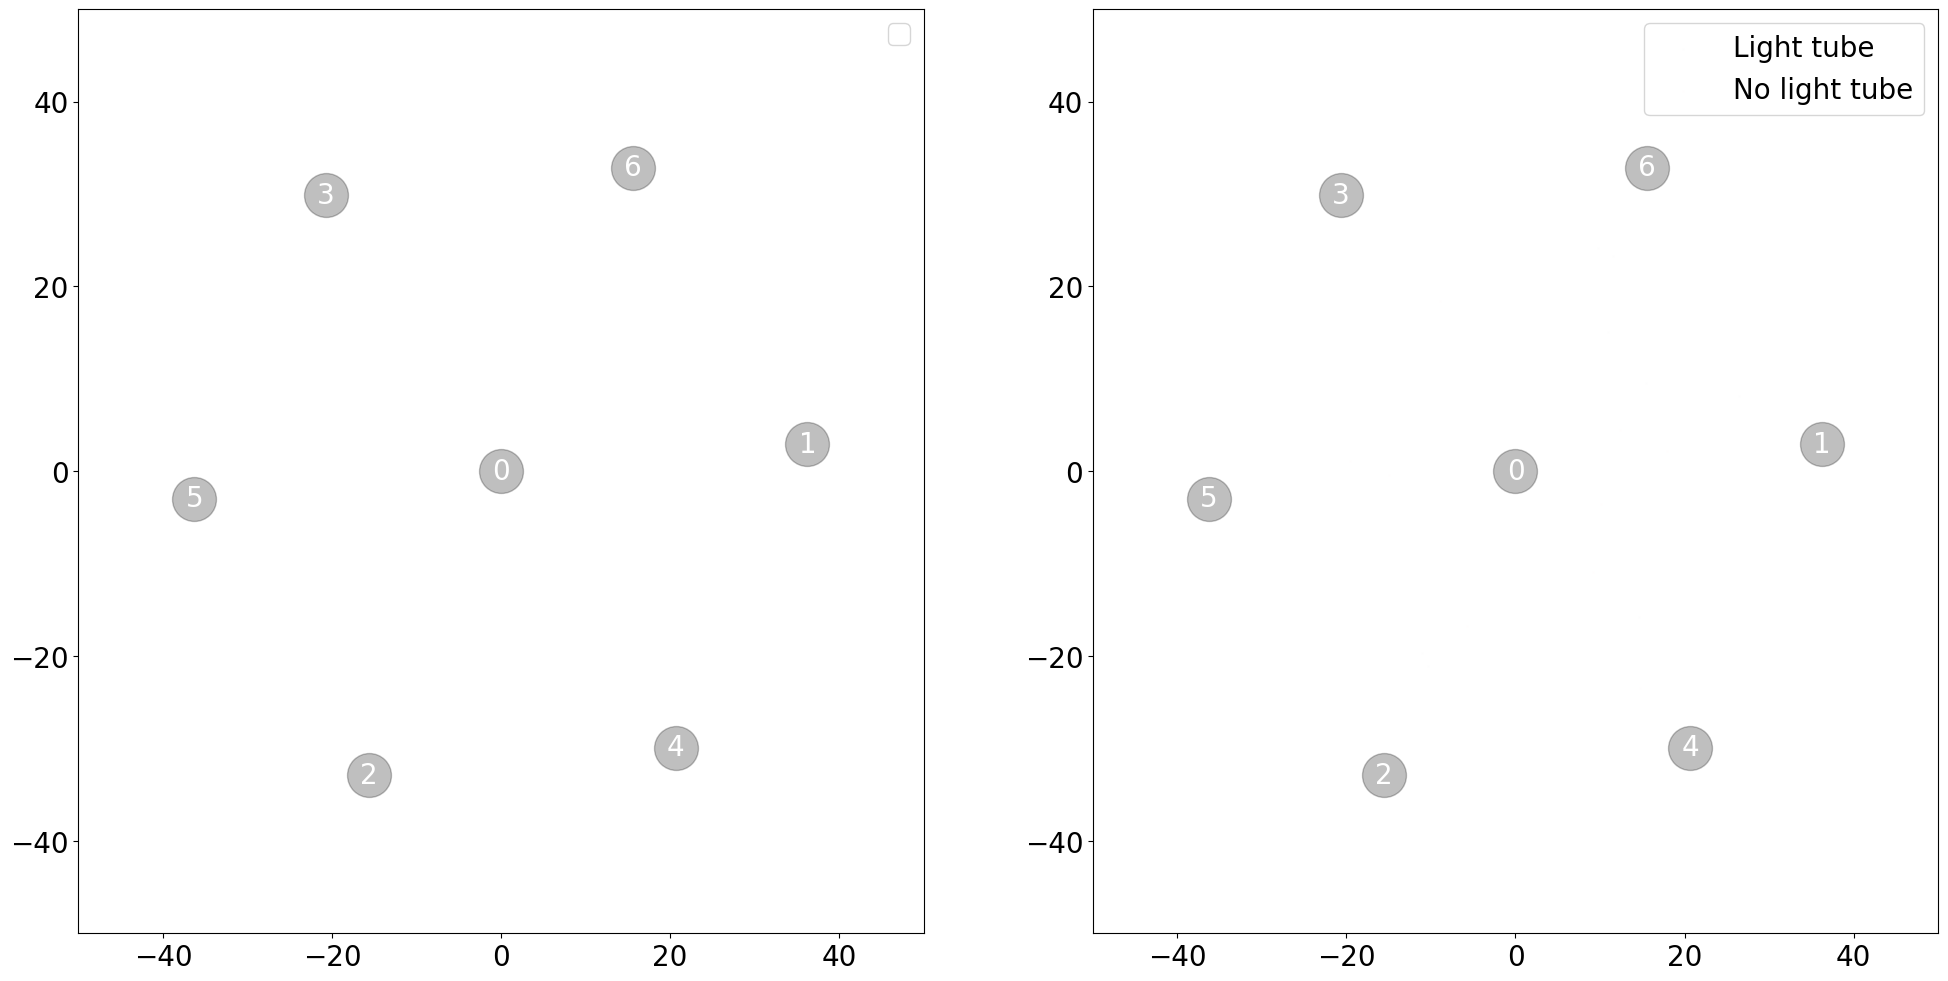

In [22]:
data_pmt = db.DataPMT('gap', 1)
x = data_pmt.X.values
y = data_pmt.Y.values

xybins = np.linspace(-50, 50, 100)

fig, axes = plt.subplots(1, 2, figsize=(24, 12))

rrange = [0, 3]
#rrange = [5, 20]
sels_r_1 = []

for data_1_s2, weights_1_s2, sel_e_1, label_1 in zip(datasets_s2, all_weights_s2_t, 
                                                                       sels_e_1, labels):
    sel1 = np.full(len(data_1_s2), True)
    sel1 = sel1 & sel_e_1 
    #sel1 = sel1 & sel_w_1 
    #sel1 = sel1 & sel_h_1 

    #axes[0].scatter(data_1_s2.x, data_1_s2.y, s=2, alpha=0.1, label=label_1);
    axes[1].scatter(data_1_s2[sel1].x, data_1_s2[sel1].y, s=2, alpha=0.005, label=label_1);

    sels_r_1.append(coref.in_range(np.sqrt(data_1_s2.x**2 + data_1_s2.y**2), *rrange))
    
for ax in axes:
    ax.scatter(x, y, s=1000, alpha=0.25, c='k')
    ax.set_xlim(xybins[0], xybins[-1])
    ax.set_ylim(xybins[0], xybins[-1])
    ax.legend()
    for i in range(7):
        ax.text(x[i], y[i], f'{i}', c='w', horizontalalignment='center', verticalalignment='center')

NameError: name 'sels_w_1' is not defined

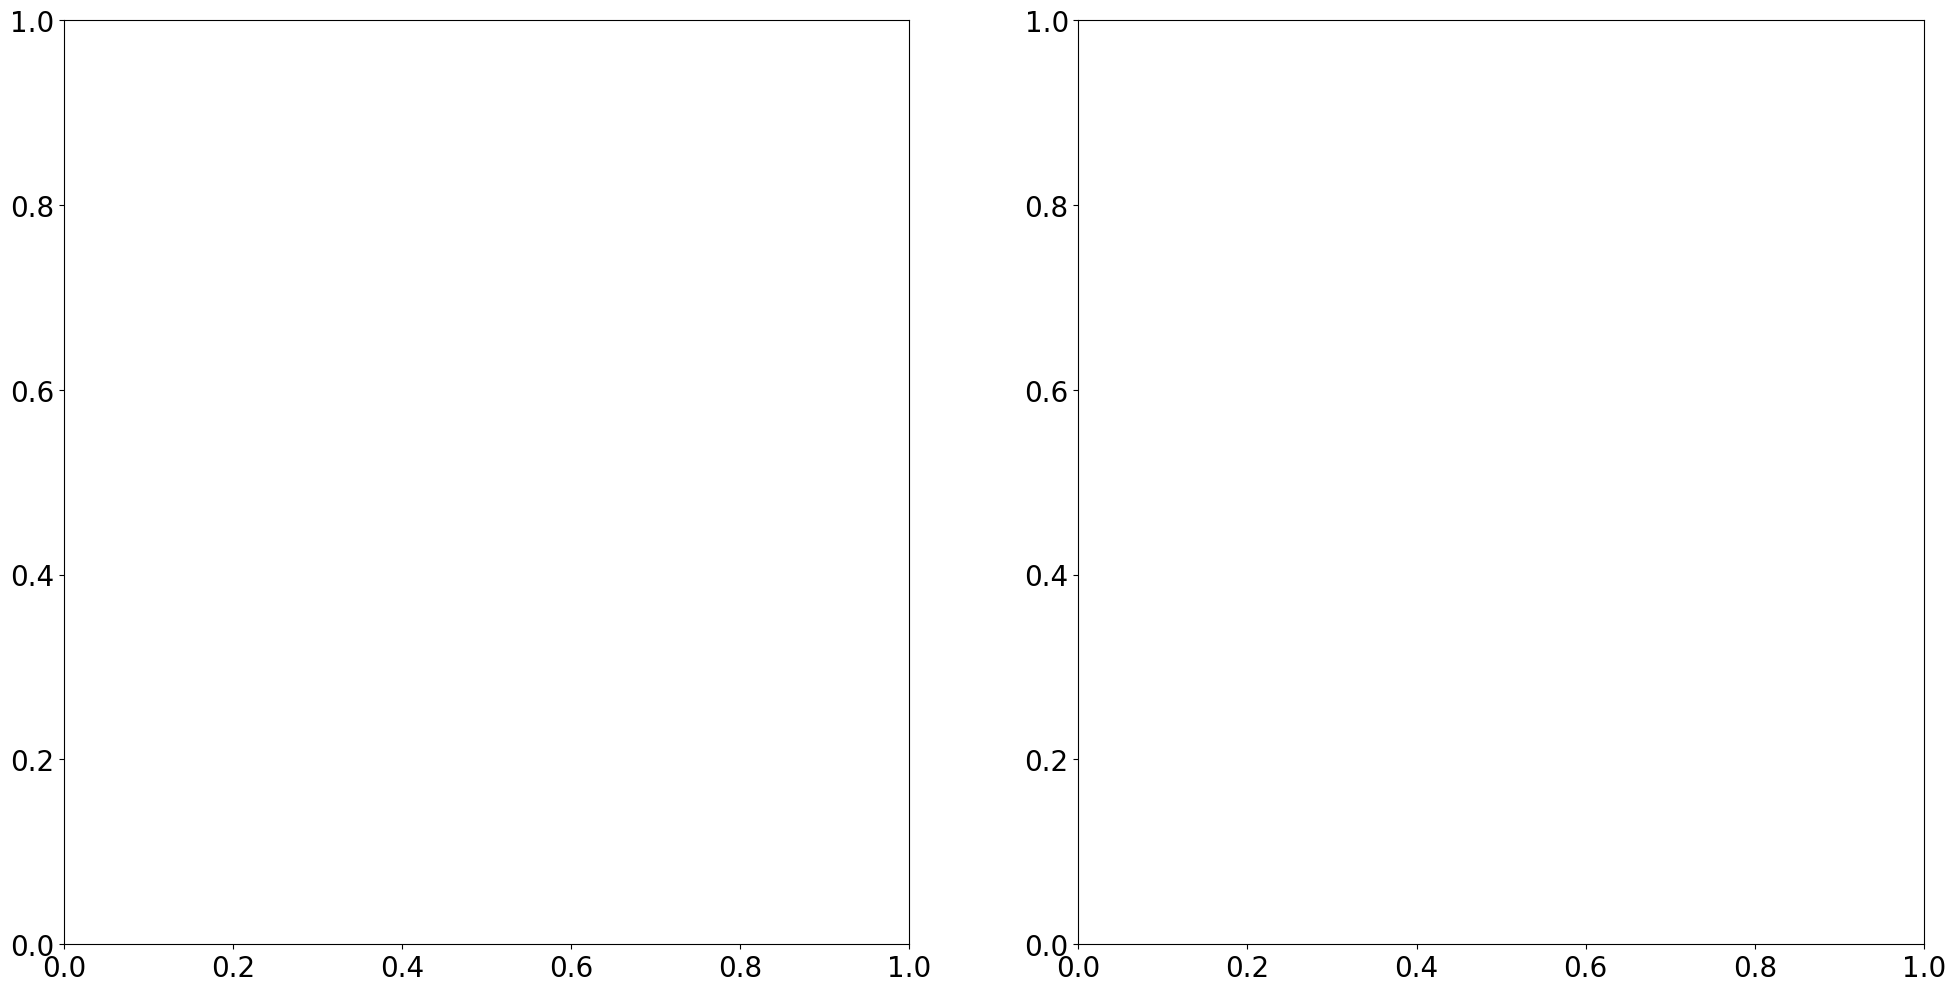

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

enebins   = np.linspace(0000, 12000, 201)
enebins_c = np.linspace(0, 60, 201)

normed = False
var    = 'energy'

eref = 2.9
eref = 5.9

for data_1_s2, weights_1_s2, sel_e_1, sel_w_1, sel_h_1, sel_r_1, label_1 in zip(datasets_s2, all_weights_s2_t, 
                                                                                sels_e_1, sels_w_1, sels_h_1, sels_r_1,
                                                                                labels):
    
    sel1 = np.full(len(data_1_s2), True)
    #sel1 = sel1 & sel_e_1 
    #sel1 = sel1 & sel_w_1 
    #sel1 = sel1 & sel_h_1 
    sel1 = sel1 & sel_r_1 
    
    
    y,x, *_ = axes[0].hist(data_1_s2[var][sel1], enebins, histtype='step', 
         lw=2, weights=weights_1_s2[sel1]/len(data_1_s2) if normed else weights_1_s2[sel1], label=label_1);
    x = coref.shift_to_bin_centers(x)
    escale_1 = x[y.argmax()]/eref

    axes[1].hist(data_1_s2[var][sel1]/escale_1, enebins_c, histtype='step', 
             lw=2, weights=weights_1_s2[sel1]/len(data_1_s2) if normed else weights_1_s2[sel1], label=label_1);
    
for ax in axes:
    ax.legend(loc=1)
    ax.set_yscale('log')

axes[0].set_xlabel('Energy (pes)')
axes[1].set_xlabel('Energy (keV)')

ar_xray   = [2.9, 3.2]
colors    = ['b'] * len(ar_xray)
#al_xray   = [1.5]
#colors   += ['k'] * fe_lines
fe_lines  = [5.9, 6.5]
colors   += ['k'] * len(fe_lines)
#cu_lines = [9.4]
#colors   += ['r'] * len(cu_lines)

am_lines = [13.9, 17.7, 20.8, 26.3, 59.6][:3] # From 2212.11515
colors   += ['g'] * len(am_lines)
am_lines2 = [am - 3 for am in am_lines]
colors   += ['olive'] * len(am_lines)
energy_lines = ar_xray  + fe_lines +  am_lines #+ am_lines2

for color, line in zip(colors, energy_lines):
    axes[1].axvline(line, c=color, ls='--')
    pass
#axes[0].axvspan(*erange, alpha=0.2)
#axes[1].axvspan(*erange, alpha=0.2)


NameError: name 'all_weights_s2' is not defined

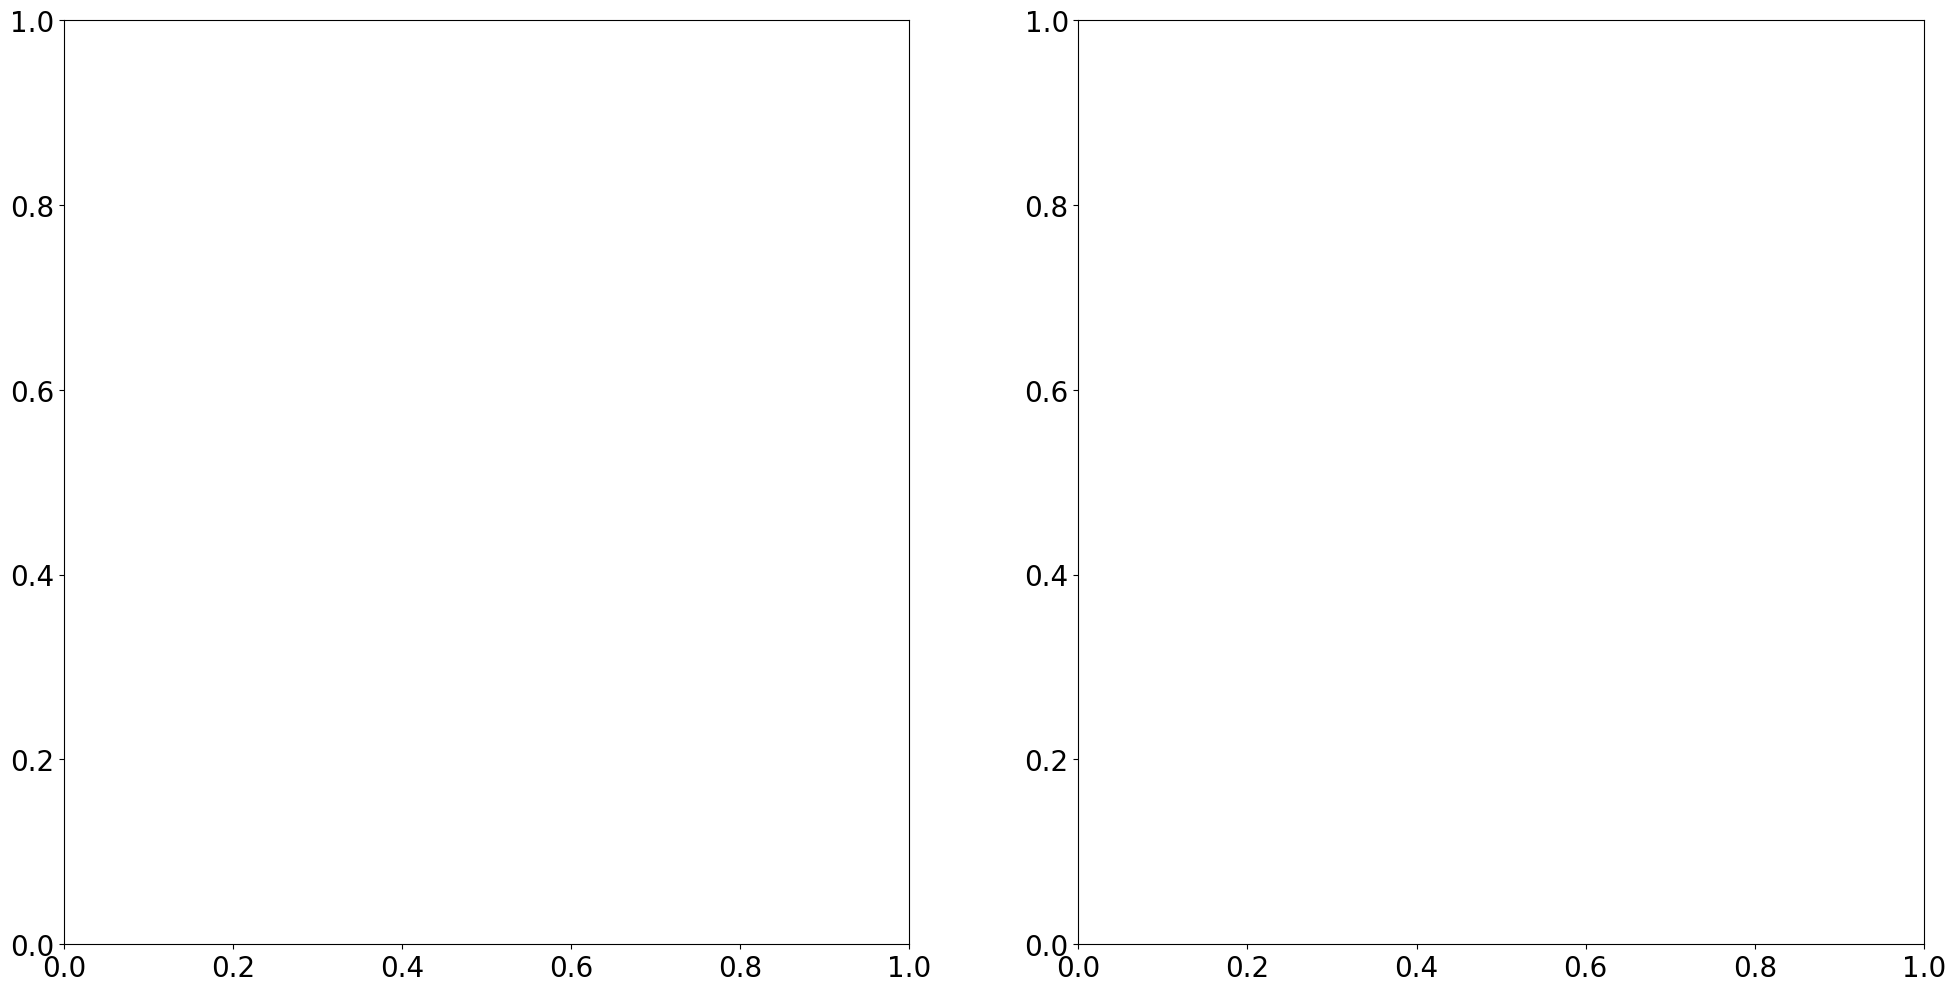

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

enebins   = np.linspace(2000, 16000, 41)
rbins     = np.sqrt(np.linspace(0, 30**2, 41))
#enebins_c = np.linspace(0, 60, 201)

normed = False
var1   = 'r'
var2   = 'energy'

eref = 2.9
#eref = 5.9

for data_1_s2, weights_1_s2, sel_e_1, sel_w_1, sel_h_1, sel_r_1, label_1 in zip(datasets_s2, all_weights_s2, 
                                                                                sels_e_1, sels_w_1, sels_h_1, sels_r_1,
                                                                                labels):
    
    sel1 = np.full(len(data_1_s2), True)
    #sel1 = sel1 & sel_e_1 
    #sel1 = sel1 & sel_w_1 
    #sel1 = sel1 & sel_h_1 
    #sel1 = sel1 & sel_r_1 
    

    axes[0].hist2d(data_1_s2[var1][sel1], data_1_s2[var2][sel1], [rbins, enebins],
         lw=2, weights=weights_1_s2[sel1]/len(data_1_s2) if normed else weights_1_s2[sel1], label=label_1,
                             norm=mpl.colors.LogNorm());
    #x = coref.shift_to_bin_centers(x)

    #axes[1].hist2d(data_1_s2[var][sel1]/escale_1, enebins_c, histtype='step', 
    #         lw=2, weights=weights_1_s2[sel1]/len(data_1_s2) if normed else weights_1_s2[sel1], label=label_1);
    
#for ax in axes:
#    ax.legend(loc=1)
#    ax.set_yscale('log')

axes[0].set_xlabel('Rad (mm)')
axes[0].set_ylabel('Energy (pes)')
#axes[1].set_xlabel('Energy (keV)')

ar_xray   = [2.9, 3.2]
colors    = ['b'] * len(ar_xray)
#al_xray   = [1.5]
#colors   += ['k'] * fe_lines
fe_lines  = [5.9, 6.5]
colors   += ['k'] * len(fe_lines)
cu_lines = [9.4]
colors   += ['r'] * len(cu_lines)

am_lines = [13.9, 17.7, 26.3, 59.6][:3] # From 2212.11515
colors   += ['g'] * len(am_lines)
am_lines2 = [am - 3 for am in am_lines]
colors   += ['olive'] * len(am_lines)
energy_lines = ar_xray  + fe_lines + cu_lines +  am_lines + am_lines2

for color, line in zip(colors, energy_lines):
    #axes[1].axvline(line, c=color, ls='--')
    pass
#axes[0].axvspan(*erange, alpha=0.2)
#axes[1].axvspan(*erange, alpha=0.2)


In [ ]:
with tb.open_file(wf_file, 'r') as h5in:
    evts       = np.array([f[0] for f in h5in.root.Run.events[:]])
    evt_number = evts[0]
    wvfs    = h5in.root.RD.pmtrwf[evt_number]
    pmt_rwf = -h5in.root.RD.pmtrwf[evt_number].sum(axis=0)
    t = np.linspace(0, len(pmt_rwf)*8/1000, len(pmt_rwf))
    plt.plot(t, pmt_rwf, drawstyle='steps', lw=1.5, zorder=0)
    plt.xlabel('Time (µs)')
    plt.ylabel('mV')"